In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import glob as glob


In [2]:
pd.read_csv

<function pandas.io.parsers._make_parser_function.<locals>.parser_f(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, doublequote=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)>

In [3]:
#Dataset scraped from SpaceX and Nasa website
data = pd.read_csv('dataset/SpaceX-Missions.csv')
data

,Flight Number,Launch Date,Launch Time,Launch Site,Vehicle Type,Payload Name,Payload Type,Payload Mass (kg),Payload Orbit,Customer Name,Customer Type,Customer Country,Mission Outcome,Failure Reason,Landing Type,Landing Outcome
0,F1-1,24 March 2006,22:30,Marshall Islands,Falcon 1,FalconSAT-2,Research Satellite,19.5,NaN,DARPA,Government,United States,Failure,Engine Fire During Launch,NaN,NaN
1,F1-2,21 March 2007,01:10,Marshall Islands,Falcon 1,DemoSat,NaN,NaN,NaN,DARPA,Government,United States,Failure,Engine Shutdown During Launch,NaN,NaN
2,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,Trailblazer,Communication Satellite,NaN,NaN,ORS,Government,United States,Failure,Collision During Launch,NaN,NaN
3,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,"PRESat, NanoSail-D",Research Satellites,8.0,NaN,NASA,Government,United States,Failure,Collision During Launch,NaN,NaN
4,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,Explorers,Human Remains,NaN,NaN,Celestis,Business,United States,Failure,Collision During Launch,NaN,NaN
5,F1-4,28 September 2008,23:15,Marshall Islands,Falcon 1,RatSat (DemoSat),NaN,165.0,Low Earth Orbit,NaN,NaN,NaN,Success,NaN,NaN,NaN
6,F1-5,14 July 2009,03:35,Marshall Islands,Falcon 1,RazakSAT,Weather Satellite,180.0,Low Earth Orbit,ATSB,Government,Malaysia,Success,NaN,NaN,NaN
7,F9-1,4 June 2010,18:45,Cape Canaveral AFS LC-40,Falcon 9 (v1.0),Dragon Spacecraft Qualification Unit,NaN,NaN,Low Earth Orbit,NaN,NaN,NaN,Success,NaN,Parachute,Failure
8,F9-2,8 December 2010,15:43,Cape Canaveral AFS LC-40,Falcon 9 (v1.0),SpaceX CRS (Dragon C1),Space Station Supplies,NaN,Low Earth Orbit,NASA,Government,United States,Success,NaN,Parachute,Failure
9,F9-3,22 May 2012,07:44,Cape Canaveral AFS LC-40,Falcon 9 (v1.0),SpaceX CRS (Dragon C2+),Space Station Supplies,NaN,Low Earth Orbit,NASA,Government,United States,Success,NaN,NaN,NaN


In [4]:
import calendar
import time
import datetime

month = {v: k for k,v in enumerate(calendar.month_name)}

def dateToTimestamp(d):
    t = d.split()
    #Converting dates into timestemps
    d = '{0}/{1}/{2}'.format(month[t[1]], t[0], t[2])
    return time.mktime(datetime.datetime.strptime(d, "%m/%d/%Y").timetuple())

data['timestamp'] = data['Launch Date'].apply(dateToTimestamp)

In [5]:
import seaborn as sns
import matplotlib
%matplotlib inline

sns.set_context("notebook")
sns.set_style("whitegrid")

def fomating_data(x, pos):
    return datetime.datetime.fromtimestamp(x).strftime('%Y-%m')

def over_time_plot(col):
    ax = sns.swarmplot(x="timestamp", y=col, data=data)
    ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(fomating_data))
    ax.set(xlabel='Date')

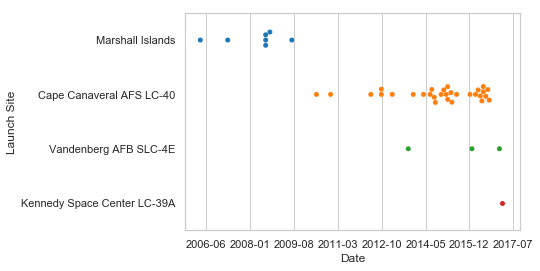

In [6]:
#What is the Launch Site over time? And what is the progress?
over_time_plot('Launch Site')

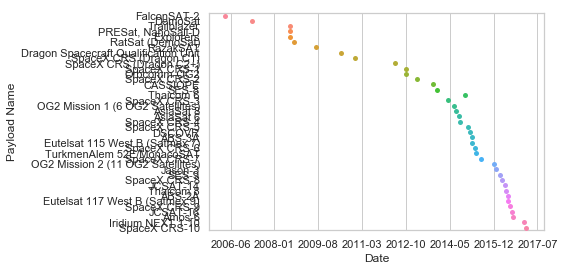

In [7]:
#Who were the Payload Name over time?
over_time_plot('Payload Name')

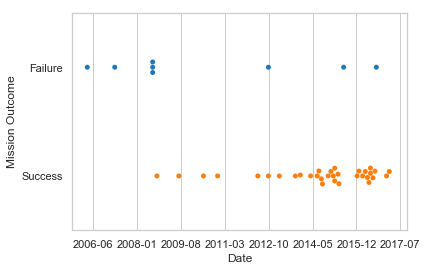

In [8]:
#What were the Mission Outcome over time?
over_time_plot('Mission Outcome')

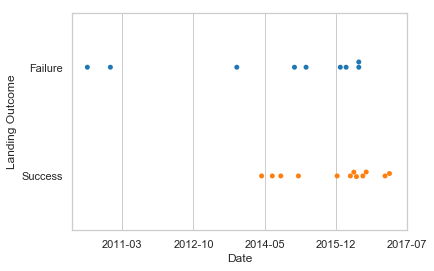

In [9]:
#What were the Landing Outcome over time?
over_time_plot('Landing Outcome')

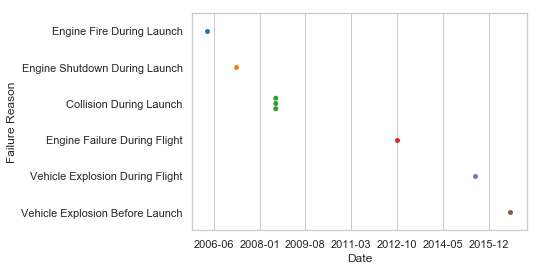

In [10]:
#What were the failure outcome and what were the reasons?
over_time_plot('Failure Reason')

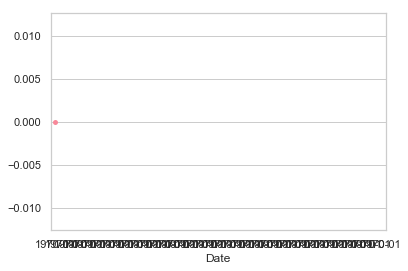

In [11]:
#Which were the Lauch site that had the best outcome and the worse?
over_time_plot('Launch Site'== 'sucess')

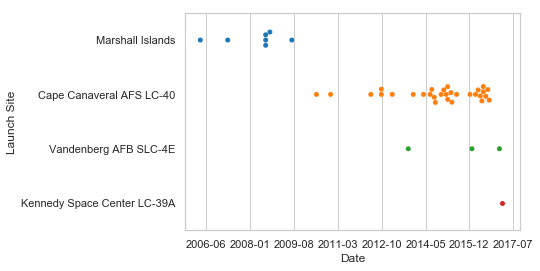

In [12]:
#Which location launch the most?
over_time_plot('Launch Site')

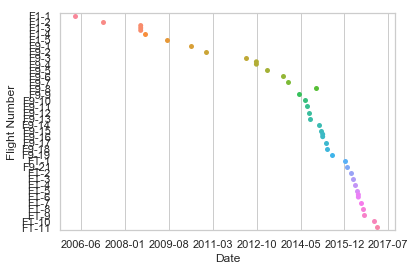

In [13]:
#What were the flight number that was launch the most?
over_time_plot('Flight Number')

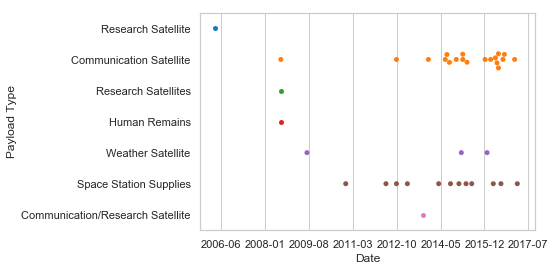

In [14]:
#What was the payload type and Missions?
over_time_plot('Payload Type')

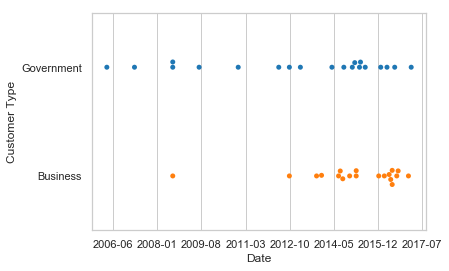

In [15]:
#Who were the biggest customers?
over_time_plot('Customer Type')

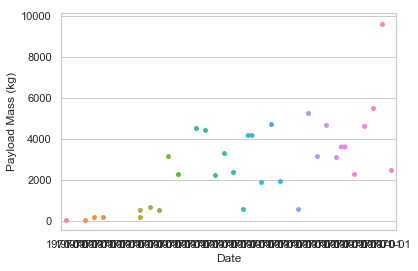

In [16]:
#What was the payload mass over time?
over_time_plot('Payload Mass (kg)')

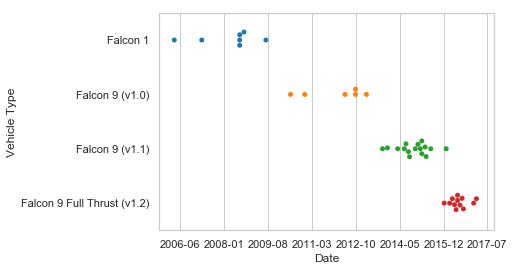

In [17]:
#Which Spaceship has the most attempts over the years?
over_time_plot('Vehicle Type')

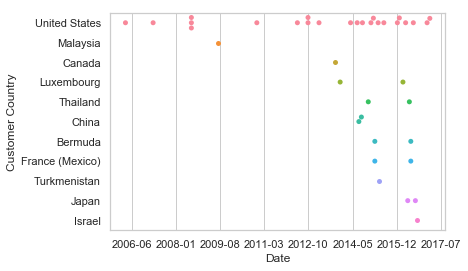

In [18]:
#Which country was the biggest custumers?
over_time_plot('Customer Country')

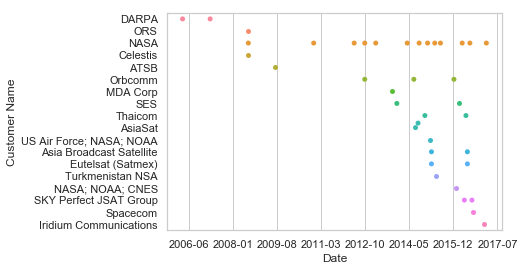

In [19]:
#Who were the custumers?
over_time_plot('Customer Name')

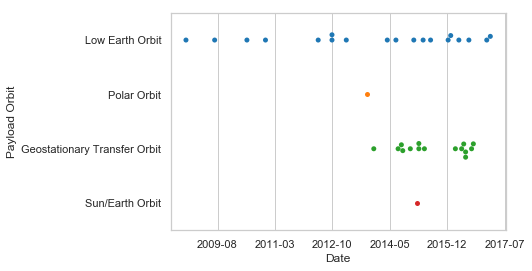

In [20]:
#Which Orbit had the most payload over time?
over_time_plot('Payload Orbit')

In [21]:
data['Mission Outcome'] = data['Mission Outcome'].replace(['Success' , 'Failure'], ['100', '0'])
data


,Flight Number,Launch Date,Launch Time,Launch Site,Vehicle Type,Payload Name,Payload Type,Payload Mass (kg),Payload Orbit,Customer Name,Customer Type,Customer Country,Mission Outcome,Failure Reason,Landing Type,Landing Outcome,timestamp
0,F1-1,24 March 2006,22:30,Marshall Islands,Falcon 1,FalconSAT-2,Research Satellite,19.5,NaN,DARPA,Government,United States,0,Engine Fire During Launch,NaN,NaN,1.143139e+09
1,F1-2,21 March 2007,01:10,Marshall Islands,Falcon 1,DemoSat,NaN,NaN,NaN,DARPA,Government,United States,0,Engine Shutdown During Launch,NaN,NaN,1.174415e+09
2,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,Trailblazer,Communication Satellite,NaN,NaN,ORS,Government,United States,0,Collision During Launch,NaN,NaN,1.217702e+09
3,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,"PRESat, NanoSail-D",Research Satellites,8.0,NaN,NASA,Government,United States,0,Collision During Launch,NaN,NaN,1.217702e+09
4,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,Explorers,Human Remains,NaN,NaN,Celestis,Business,United States,0,Collision During Launch,NaN,NaN,1.217702e+09
5,F1-4,28 September 2008,23:15,Marshall Islands,Falcon 1,RatSat (DemoSat),NaN,165.0,Low Earth Orbit,NaN,NaN,NaN,100,NaN,NaN,NaN,1.222540e+09
6,F1-5,14 July 2009,03:35,Marshall Islands,Falcon 1,RazakSAT,Weather Satellite,180.0,Low Earth Orbit,ATSB,Government,Malaysia,100,NaN,NaN,NaN,1.247510e+09
7,F9-1,4 June 2010,18:45,Cape Canaveral AFS LC-40,Falcon 9 (v1.0),Dragon Spacecraft Qualification Unit,NaN,NaN,Low Earth Orbit,NaN,NaN,NaN,100,NaN,Parachute,Failure,1.275590e+09
8,F9-2,8 December 2010,15:43,Cape Canaveral AFS LC-40,Falcon 9 (v1.0),SpaceX CRS (Dragon C1),Space Station Supplies,NaN,Low Earth Orbit,NASA,Government,United States,100,NaN,Parachute,Failure,1.291747e+09
9,F9-3,22 May 2012,07:44,Cape Canaveral AFS LC-40,Falcon 9 (v1.0),SpaceX CRS (Dragon C2+),Space Station Supplies,NaN,Low Earth Orbit,NASA,Government,United States,100,NaN,NaN,NaN,1.337625e+09


[Text(0.5, 0, 'Date')]

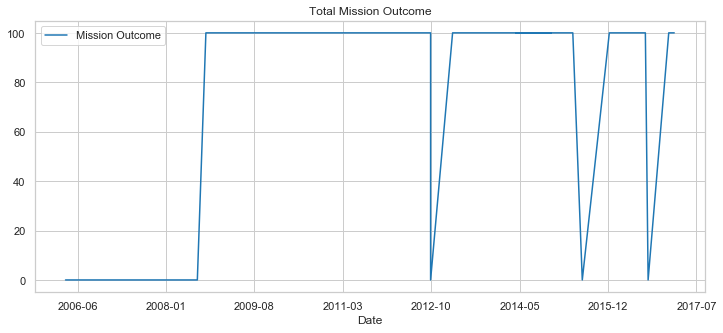

In [22]:
import seaborn as sns
import matplotlib
%matplotlib inline

data['Mission Outcome'] = pd.to_numeric(data['Mission Outcome'], errors='coerce')

def fomating_data(x, pos):
    return datetime.datetime.fromtimestamp(x).strftime('%Y-%m')

data = data.iloc[::1]
ax = data.plot(x='timestamp', y='Mission Outcome', title="Total Mission Outcome", figsize=(12,5))
ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(fomating_data))
ax.set(xlabel='Date')

In [24]:
#Dataset given by SpaceX
spaceX_launch = 'dataset/SpaceX-Launch-Data.csv'

launch = pd.read_csv(spaceX_launch)
launch

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Mission Outcome,Landing Outcome
0,1,"June 4, 2010",18:45,F9 v1.0,CCAFS LC-40,Dragon Spacecraft Qualification Unit,NaN,LEO,SpaceX,Success,Failure (parachutes)
1,2,"December 8, 2010",15:43,F9 v1.0,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",NaN,LEO,NASA (COTS) NRO,Success,Failure (parachutes)
2,3,"May 22, 2012",7:44,F9 v1.0,CCAFS LC-40,Dragon demo flight C2+,525,LEO,NASA (COTS),Success,No attempt
3,4,"October 8, 2012",0:35,F9 v1.0,CCAFS LC-40,SpaceX CRS-1,500,LEO,NASA (CRS),Success,No attempt
4,5,"March 1, 2013",15:10,F9 v1.0,CCAFS LC-40,SpaceX CRS-2,677,LEO,NASA (CRS),Success,No attempt
5,6,"September 29, 2013",16:00,F9 v1.1,VAFB SLC-4E,CASSIOPE,500,Polar orbit,MDA,Success,Failure (ocean)
6,7,"December 3, 2013",22:41,F9 v1.1,CCAFS LC-40,SES-8,"3,170",GTO,SES,Success,No attempt
7,8,"January 6, 2014",22:06,F9 v1.1,CCAFS LC-40,Thaicom 6,"3,325",GTO,Thaicom,Success,No attempt
8,9,"April 18, 2014",19:25,F9 v1.1,CCAFS LC-40,SpaceX CRS-3,"2,296",LEO,NASA (CRS),Success,Success (ocean)
9,10,"July 14, 2014",15:15,F9 v1.1,CCAFS LC-40,OG2 Mission 1 6 Orbcomm-OG2 satellites,"1,316",LEO,Orbcomm,Success,Success (ocean)


In [25]:
import calendar
import time
import datetime

launch['Date'] = launch['Date'].str.replace(',', '')

month = {v: k for k,v in enumerate(calendar.month_name)}

def dateToTimestamp(d):
    t = d.split()

    # ignore row 37
    if t[2][0] == "0":
        return
    
    
    # Converting dates into timestemps
    d = '{0}/{1}/{2}'.format(month[t[0]], t[1], t[2])
    test = time.mktime(datetime.datetime.strptime(d, "%m/%d/%Y").timetuple())

launch['timestamp'] = launch['Date'].apply(dateToTimestamp)



In [26]:
import seaborn as sns
import matplotlib
%matplotlib inline

sns.set_context("notebook")
sns.set_style("whitegrid")

def fomating_data(x, pos):
    return datetime.datetime.fromtimestamp(x).strftime('%Y-%m')

def over_time_plot(col):
    ax = sns.swarmplot(x="timestamp", y=col, data=data)
    ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(fomating_data)) 
    ax.set(xlabel='Date')

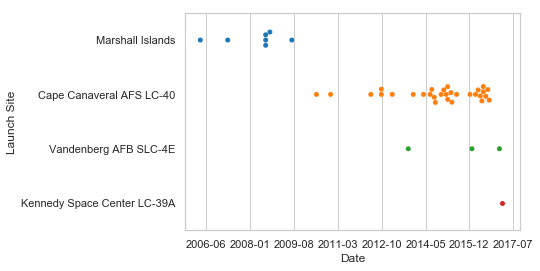

In [27]:
over_time_plot('Launch Site')

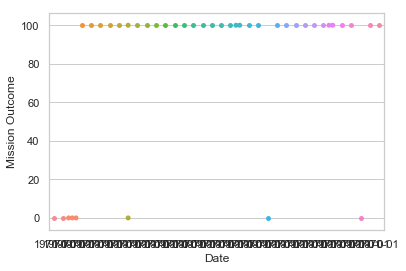

In [28]:
over_time_plot('Mission Outcome')

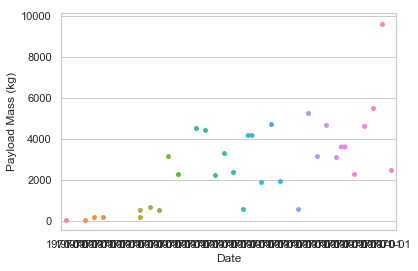

In [29]:
over_time_plot('Payload Mass (kg)')

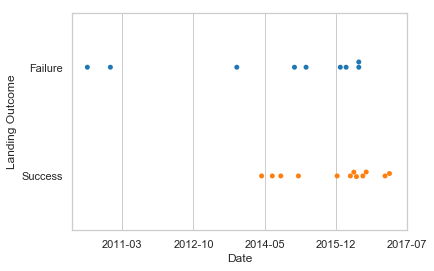

In [30]:
over_time_plot('Landing Outcome')